# PART 1 
## DOMAIN: Digital content and entertainment industry
### CONTEXT: 
The objective of this project is to build a text classification model that  analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.

### DATA DESCRIPTION: 
The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are 
indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

## PROJECT OBJECTIVE: 
Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.

### Steps and tasks: [ Total Score: 30 points]
1. Import and analyse the data set.
Hint: - Use `imdb.load_data()` method
 - Get train and test set
 - Take 10000 most frequent words
2. Perform relevant sequence adding on the data
3. Perform following data analysis:
 - Print shape of features and labels
 - Print value of any one feature and it's label
4. Decode the feature value to get original sentence
5. Design, train, tune and test a sequential model. 
Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN classifiers. Be analytical and experimental here in trying new approaches to design the best model.
6. Use the designed model to print the prediction on any one sample.

In [ ]:
import tensorflow
tensorflow.__version__

import random
random.seed(0)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_path = '/content/drive/MyDrive/Colab/NLP/Project2/'

### 1. Import and analyse the data set.
Hint: - Use `imdb.load_data()` method
 - Get train and test set
 - Take 10000 most frequent words

In [ ]:
from tensorflow.keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000, seed=0)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [ ]:
X_train[:5]

array([list([1, 4078, 2, 9, 448, 725, 4, 2, 241, 2, 241, 38, 111, 2, 500, 40, 91, 374, 500, 679, 102, 13, 62, 135, 4, 2159, 92, 7241, 83, 6, 275, 3449, 66, 73, 5, 15, 271, 18, 14, 31, 99, 2149, 10, 10, 225, 6, 184, 196, 8127, 63, 2568, 5, 732, 4, 863, 18, 4, 65, 5, 4, 1397, 1111, 23, 63, 6, 564, 4892, 2, 5, 27, 476, 577, 2, 2, 2, 5, 492, 2, 2, 2, 216, 8, 847, 83, 4, 9370, 92, 168, 32, 99, 2575, 5, 515, 195, 481, 2017, 9, 348, 44, 4, 2, 23, 4, 1111, 8, 789, 2, 280, 4, 2, 517, 2, 10, 10, 1958, 5, 1364, 183, 380, 8, 140, 2, 5, 263, 6308, 140, 23, 6, 1973, 3318, 187, 4, 3450, 8, 1974, 618, 51, 9, 1448, 23, 14, 2, 1111, 19, 94, 680, 5818, 21, 11, 882, 25, 80, 24, 1414, 19, 803, 170, 23, 17, 2, 5, 2447, 2953, 79, 1376, 11, 8, 2, 4, 114, 60, 53, 51, 16, 66, 3742, 12, 83, 4, 5513, 7, 78, 212, 26, 94, 2, 1815, 2611, 46, 7, 4, 5797, 388, 63, 43, 2266, 5342, 2, 33, 94, 2099, 3002, 366, 45, 1852, 76, 303, 45, 31, 155, 269, 8, 216, 56, 5, 984, 142, 1393, 21, 160, 155, 399, 12, 4521, 5, 19, 2, 2380,

In [ ]:
y_train[:5]

array([0, 1, 0, 1, 1])

In [ ]:
X_test[0:5]

array([list([1, 13, 244, 8841, 8, 67, 15, 38, 111, 84, 28, 348, 1123, 857, 18, 14, 22, 14, 20, 47, 57, 1653, 6229, 4, 228, 9, 24, 52, 4, 116, 9, 1235, 13, 28, 6, 878, 58, 1897, 89, 294, 100, 358, 14, 20, 387, 584, 1941, 94, 2, 4, 326, 9, 527, 813, 139, 7331, 8, 4, 114, 141, 17, 4, 3501, 119, 65, 60, 151, 4, 915, 731, 602, 9, 6, 2, 419, 26, 38, 78, 15, 13, 473, 8, 81, 546, 2, 5395, 137, 149, 98, 4, 192, 15, 50, 9, 136, 11, 63, 6, 2, 419, 4137, 467, 6, 8190, 3738, 38, 29, 70, 235, 41, 56, 5, 59, 1232, 12, 9, 282, 195, 18, 316, 3445, 19, 14, 22, 8, 2, 4, 4304, 8, 1263, 499, 65, 70, 64, 30, 6, 9091, 237, 8, 2892, 141, 6, 87, 20, 11, 141, 6, 527, 31, 9, 6117, 584, 8, 2330, 32, 4651, 7, 14, 20, 8, 97, 6, 196, 65, 346, 14, 22, 9, 527, 11, 175, 96, 5, 48, 13, 69, 61, 96, 316, 37, 1232, 12, 144, 140, 730, 8, 609]),
       list([1, 6, 2, 11, 1360, 479, 9, 31, 7, 4, 3516, 7, 87, 108, 46, 50, 15, 8632, 1015, 8, 30, 446, 6, 356, 12, 16, 4, 431, 15, 93, 2, 1983, 2, 6, 2, 7, 22, 231, 33, 4, 58, 5, 63

In [ ]:
y_test[0:5]

array([0, 1, 0, 1, 0])

In [ ]:
max(max(i) for i in X_train)

9999

In [ ]:
# Get Word index from the dataset to decode the integers back to words
word_index = imdb.get_word_index()

In [ ]:
# Convert the dictionary from word->index to index->word for decoding
index_to_word = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
# Let's decode few samples using various indices
print(index_to_word.get(1))
print(index_to_word.get(4))
print(index_to_word.get(16))
print(index_to_word.get(100))
print(index_to_word.get(2000))
print(index_to_word.get(5000))
print(index_to_word.get(10000))
# The indices in ascending order indicate the words from most frequently used words to least frequent words

the
of
with
after
behavior
1987
approved


In [ ]:
# Let's now decode a specific review
def decode_review(X, y):
  decoded_review = ' '.join([index_to_word.get(i-3, '?') for i in X])
  if (y == 0):
    print('This is a negative review \n')
  else:
    print('This is a positive review \n')
  return (decoded_review)

In [ ]:
# Check review type
k = 5
decoded_imdb_review = decode_review(X_train[k], y_train[k])
decoded_imdb_review

This is a negative review 



"? there is an excellent reason edison went straight to video it would have landed in theaters with a ? ? the movie lasted entirely too long and was ? boring just a notch above ? thanks to freeman and spacey who obviously had a spare two weeks before their next films the bad guys are as laughable and action as near non existent as justin ? acting i hate to knock the guy but the sooner he realizes that pop is his ? the better br br the movie isn't all bad just mostly i like the fact that ll cool j was given what appears to be a shot at being leading man he deserves it and unlike his fellow musician and co star he can act kevin spacey is almost always enjoyable as well you can see him ? several times as he ? the scenery and freeman has the ability to elevate this flick to three stars out of ten he's not that good br br when all is said and done the ultimate error with this movie is that it is a mundane and tiresome piece of pseudo action ? that fails to keep anyone awake it also fails to

### 2. Perform relevant sequence adding on the data


In [ ]:
# Sequence and padding the Training data
from tensorflow.keras.preprocessing import sequence
review_length = 20
X_train = sequence.pad_sequences(X_train, maxlen=review_length)

In [ ]:
# Similarly pad the test data
X_test = sequence.pad_sequences(X_test, maxlen=review_length)

### 3. Perform following data analysis:
 - Print shape of features and labels
 - Print value of any one feature and it's label

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25000, 20) (25000,) (25000, 20) (25000,)


In [ ]:
X_train[0]

array([3788,    5, 6048,   21,   13,   80,   30,   15, 3759,   45,  131,
         24,  290,    4,   58,   38,  128,    8,  798,   14], dtype=int32)

In [ ]:
y_train[0]

0

### 4. Decode the feature value to get original sentence


In [ ]:
# Check review type with reduced review size
k = 5
decoded_imdb_review = decode_review(X_train[k], y_train[k])
decoded_imdb_review

This is a negative review 



'the characters all in all ? just plain boring that being said rent this when you are suffering from insomnia'

### 5. Design, train, tune and test a sequential model. 
Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN classifiers. Be analytical and experimental here in trying new approaches to design the best model.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Activation, Dense
from tensorflow.keras.layers import Embedding

In [ ]:
model = Sequential()

In [ ]:
model.add(Embedding(10000, 64, input_length=20))
model.add(LSTM(20))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 17s 20ms/step - loss: 0.5775 - accuracy: 0.6819 - val_loss: 0.4720 - val_accuracy: 0.7688
Epoch 2/5
782/782 [==============================] - 15s 19ms/step - loss: 0.3884 - accuracy: 0.8214 - val_loss: 0.4764 - val_accuracy: 0.7681
Epoch 3/5
782/782 [==============================] - 15s 19ms/step - loss: 0.3077 - accuracy: 0.8668 - val_loss: 0.5438 - val_accuracy: 0.7601
Epoch 4/5
782/782 [==============================] - 15s 19ms/step - loss: 0.2392 - accuracy: 0.8966 - val_loss: 0.6132 - val_accuracy: 0.7527
Epoch 5/5
782/782 [==============================] - 15s 19ms/step - loss: 0.1804 - accuracy: 0.9239 - val_loss: 0.6995 - val_accuracy: 0.7450


In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 20, 64)            640000    
_________________________________________________________________
lstm_11 (LSTM)               (None, 20)                6800      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 646,821
Trainable params: 646,821
Non-trainable params: 0
_________________________________________________________________


In [ ]:
score = model.evaluate(X_test, y_test)
print("Test Accuracy: %.2f%%" %(score[1]*100))

782/782 [==============================] - 2s 3ms/step - loss: 0.6995 - accuracy: 0.7450
Test Accuracy: 74.50%


### 6. Use the designed model to print the prediction on any one sample.

In [ ]:
y_pred = model.predict(X_test, batch_size=32)

In [ ]:
# Check review type
k = 2
decoded_imdb_review = decode_review(X_test[k], y_test[k])
decoded_imdb_review

This is a negative review 



'have to wait even longer before a version of this story comes to the screen that truly does it justice'

In [ ]:
# Predicted review type
y_pred[k]

array([0.3342913], dtype=float32)

In [ ]:
# Check another review and prediction
k = 100
decoded_imdb_review = decode_review(X_test[k], y_test[k])
print(y_pred[k])
decoded_imdb_review

This is a positive review 

[0.61986214]


"odd in this one just a taut thriller you'll want to know how this story ends once you start watching"

# PART 2

## DOMAIN: Social media analytics
## CONTEXT: 
Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.
### DATA DESCRIPTION:
The dataset is collected from two news websites, theonion.com and huffingtonpost.com. This new dataset has the following advantages over the existing Twitter datasets:

Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings.

Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.
Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the real sarcastic elements

### Content: 
Each record consists of three attributes:

* is_sarcastic: 1 if the record is sarcastic otherwise 0
* headline: the headline of the news article
* article_link: link to the original news article. Useful in collecting  supplementary data

Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection

## PROJECT OBJECTIVE: 
Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.

### Steps and tasks: [ Total Score: 30 points]
1. Read and explore the data
2. Retain relevant columns
3. Get length of each sentence
4. Define parameters
5. Get indices for words
6. Create features and labels
7. Get vocabulary size
8. Create a weight matrix using GloVe embeddings
9. Define and compile a Bidirectional LSTM model.
Hint: Be analytical and experimental here in trying new approaches to design the best model.
10. Fit the model and check the validation accuracy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read and explore the data


In [ ]:
data_path = '/content/drive/MyDrive/Colab/NLP/Project2/Data - Sarcasm Detection./'
data = pd.read_json(data_path+'Sarcasm_Headlines_Dataset.json', orient='records', lines=True)
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
data.describe()

,is_sarcastic
count,26709.000000
mean,0.438953
std,0.496269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [ ]:
data.shape

(26709, 3)

### 2. Retain relevant columns


In [ ]:
# Drop article link
data.drop(['article_link'], axis=1, inplace=True)
data.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


### 3. Get length of each sentence


In [ ]:
j = 10
len(data.headline[j].split())

10

In [ ]:
data['length'] = data['headline'].apply(lambda w: len(w.split()))
data.head()

,headline,is_sarcastic,length
0,former versace store clerk sues over secret 'b...,0,12
1,the 'roseanne' revival catches up to our thorn...,0,14
2,mom starting to fear son's web series closest ...,1,14
3,"boehner just wants wife to listen, not come up...",1,13
4,j.k. rowling wishes snape happy birthday in th...,0,11


In [ ]:
data['is_sarcastic'].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

(array([14985.,     0., 11724.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

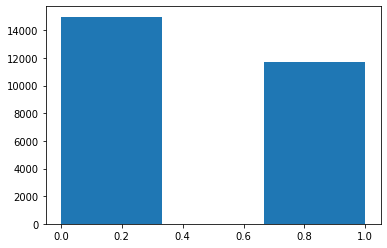

In [ ]:
plt.hist(data['is_sarcastic'], bins=3)

### 4. Define parameters


In [ ]:
train_size = int(data.shape[0]*0.8)
print(train_size)

21367


In [ ]:
embed_size = 100

In [ ]:
max_len = 32

### 5. Get indices for words


In [ ]:
# for each line in the glove embedding text file, the first value is the word and the second value is the embedding (100 dimension array)
# Storing the values into a dictionary
emb_index = {}
with open(data_path + 'glove.6B.100d.txt') as file:
  for line in file:
    val = line.split()
    word = val[0]
    coefs = np.asarray(val[1:], dtype='float32')
    emb_index[word] = coefs


In [ ]:
len(emb_index)

400000

### 6. Create features and labels


In [ ]:
train_lines = data['headline'][:train_size]
test_lines = data['headline'][train_size:]
train_label = data['is_sarcastic'][:train_size]
test_label = data['is_sarcastic'][train_size:]

In [ ]:
print(train_lines.shape, test_lines.shape, train_label.shape, test_label.shape)

(21367,) (5342,) (21367,) (5342,)


In [ ]:
# Tokenize the sentences and pad them to make equal length
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(data['headline'])
word_index = tokenizer.word_index

In [ ]:
# Convert train data to padded sequences of integer values
train_seq = tokenizer.texts_to_sequences(train_lines)
train_padded = pad_sequences(train_seq, maxlen=max_len, padding='post', truncating='post')

In [ ]:
# Convert test data to padded sequences of integer values
test_seq = tokenizer.texts_to_sequences(test_lines)
test_padded = pad_sequences(test_seq, maxlen=max_len, padding='post', truncating='post')

In [ ]:
print(train_padded.shape, test_padded.shape, train_label.shape, test_label.shape)

(21367, 32) (5342, 32) (21367,) (5342,)


### 7. Get vocabulary size


In [ ]:
vocab_size = len(word_index)
vocab_size

29657

### 8. Create a weight matrix using GloVe embeddings


In [ ]:
emb_matrix = np.zeros((vocab_size+1, embed_size))
for key in sorted(word_index, key=word_index.get)[:vocab_size]:
  embedding_vector = emb_index.get(key)
  if embedding_vector is not None:
    emb_matrix[word_index[key]] = embedding_vector

In [ ]:
emb_matrix.shape

(29658, 100)

### 9. Define and compile a Bidirectional LSTM model.
Hint: Be analytical and experimental here in trying new approaches to design the best model.

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [349]:
# Define the Sequential model with Embeddings initialized with the weights of the emb_matrix we created earlier
# Add bidirectional LSTM and  return only the last sequence for many-to-one task
# Finally Add Dense layer with sigmoid activation to give a binary output probability
bi_lstm = Sequential()
bi_lstm.add(Embedding(vocab_size+1, embed_size, input_length=max_len, weights=[emb_matrix]))
bi_lstm.add(Dropout(0.2))
bi_lstm.add(Bidirectional(LSTM(64, return_sequences=True)))
bi_lstm.add(Dropout(0.2))
bi_lstm.add(Dense(1, activation='sigmoid'))

In [350]:
# Compile the model
bi_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### 10. Fit the model and check the validation accuracy

In [351]:
from tensorflow.keras.callbacks import EarlyStopping

In [352]:
# Define callback to find the best weights
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [353]:
# Fit the model
bi_lstm.fit(train_padded, train_label, batch_size=32, epochs=10, validation_data=(test_padded, test_label))

Epoch 1/10
668/668 [==============================] - 54s 76ms/step - loss: 0.5356 - accuracy: 0.7121 - val_loss: 0.3407 - val_accuracy: 0.8594
Epoch 2/10
668/668 [==============================] - 49s 74ms/step - loss: 0.2705 - accuracy: 0.8884 - val_loss: 0.2974 - val_accuracy: 0.8684
Epoch 3/10
668/668 [==============================] - 49s 74ms/step - loss: 0.1753 - accuracy: 0.9325 - val_loss: 0.3016 - val_accuracy: 0.8719
Epoch 4/10
668/668 [==============================] - 49s 74ms/step - loss: 0.1175 - accuracy: 0.9564 - val_loss: 0.3492 - val_accuracy: 0.8716
Epoch 5/10
668/668 [==============================] - 49s 74ms/step - loss: 0.0732 - accuracy: 0.9742 - val_loss: 0.4193 - val_accuracy: 0.8667
Epoch 6/10
668/668 [==============================] - 50s 74ms/step - loss: 0.0517 - accuracy: 0.9822 - val_loss: 0.4503 - val_accuracy: 0.8666
Epoch 7/10
668/668 [==============================] - 50s 75ms/step - loss: 0.0340 - accuracy: 0.9888 - val_loss: 0.4646 - val_accuracy:

In [354]:
bi_lstm.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 32, 100)           2965800   
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 100)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 32, 128)           84480     
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 128)           0         
_________________________________________________________________
dense_13 (Dense)             (None, 32, 1)             129       
Total params: 3,050,409
Trainable params: 3,050,409
Non-trainable params: 0
_________________________________________________________________


In [356]:
# Checking Validation accuracy
val_accuracy = bi_lstm.evaluate(test_padded, test_label)
print('Validation Accuracy: %.2f%%' %(val_accuracy[1]*100))

167/167 [==============================] - 2s 10ms/step - loss: 0.6545 - accuracy: 0.8593
Validation Accuracy: 85.93%
